<a href="https://colab.research.google.com/github/sbarkerclarke-phd/CoOccurR/blob/main/deconvolute_h%26e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from matplotlib.image import pil_to_array
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import skimage

from skimage import data
from skimage.color import rgb2hed, hed2rgb

In [141]:
#Example stain vector matrix
#0.65 0.70 0.29
#0.07 0.99 0.11
#0.27 0.57 0.78

#Deconvolution matrix is the INVERSE of the stain vector matrix 
#1.88 −0.07 −0.60
#−1.02 1.13 −0.48
#−0.55 −0.13 1.57

#hematoxylin
a0,c0,e0 = 1.88, -0.49, -0.66
#eosin
b0,d0,f0 = -1.05, 1.29, -0.52
#dab
i,j,k = -0.45, -0.43, 1.27


hematrix = [[a,b,i],[c,d,j],[e,f,k]]
hematrix = np.array(hematrix)


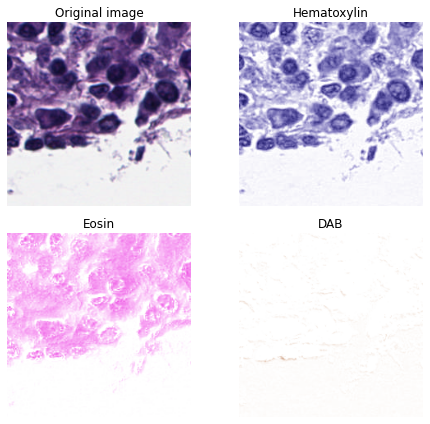

In [142]:
for a,b,c,d,e,f in [[a0,b0,c0,d0,e0,f0]]:

  hematrix = [[a,b,i],[c,d,j],[e,f,k]]
  hematrix = np.array(hematrix)
  # Example IHC image
  ihc_rgb = data.immunohistochemistry()
  # IHC/HE Image example
  ihc_rgb =  Image.open("/content/drive/MyDrive/he_examples/669.png")
  
  ax[0].imshow(ihc_rgb)
  # Separate the stains from the IHC image
  ihc_hed = skimage.color.separate_stains(ihc_rgb, hematrix)
  invmatrix = np.linalg.inv(hematrix)

  # Create an RGB image for each of the stains
  null = np.zeros_like(ihc_hed[:, :, 0])
  ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
  ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
  ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
  ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

  # Display
  fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
  ax = axes.ravel()

  ax[0].imshow(ihc_rgb)
  ax[0].set_title("Original image")

  ax[1].imshow(ihc_h)
  ax[1].set_title("Hematoxylin")

  ax[2].imshow(ihc_e)
  ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

  ax[3].imshow(ihc_d)
  ax[3].set_title("DAB")

  for a in ax.ravel():
      a.axis('off')

  fig.tight_layout()


In [142]:
# Iterate through files and 